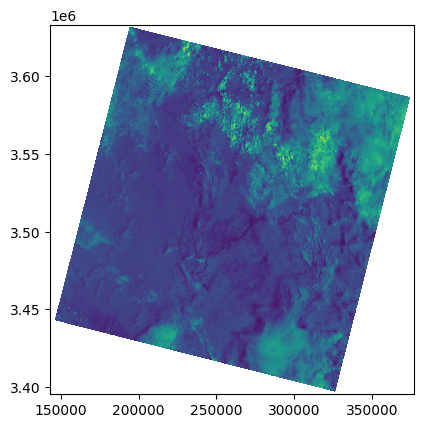

<Axes: >

In [1]:
import rasterio
from rasterio.plot import show
# import rasterio
import geotiff
import tifffile
from PIL import Image
img = rasterio.open("C:\\Users\\IDEAL COMPUTER S\\DIP_LAB\\lab2\\composite\\composite1.tif")
show(img)
# pixels = img.load()

READING MULTIPLE BANDS!

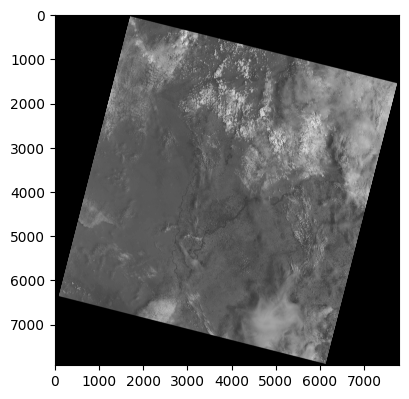

In [2]:
import matplotlib.pyplot as plt
img_band1 = img.read(1)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
# Add your plotting code here using ax1

# For example, you can show the image using imshow:
ax1.imshow(img_band1, cmap='gray')

plt.show()

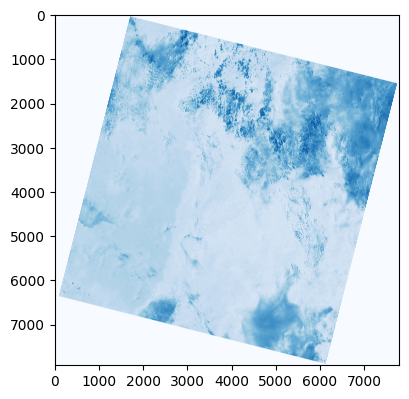

In [3]:
import matplotlib.pyplot as plt
img_band2 = img.read(2)
fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(2, 2, 2)
# Add your plotting code here using ax1

# For example, you can show the image using imshow:
ax2.imshow(img_band2, cmap='Blues')

plt.show()

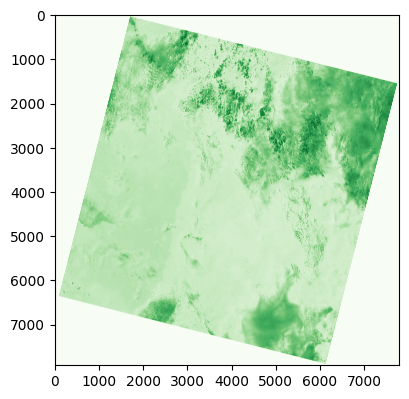

In [4]:
import matplotlib.pyplot as plt
img_band3 = img.read(3)
fig3 = plt.figure(figsize=(10, 10))
ax3 = fig3.add_subplot(2, 2, 3)
# Add your plotting code here using ax1

# For example, you can show the image using imshow:
ax3.imshow(img_band3, cmap='Greens')

plt.show()

In [5]:
import rasterio

# Open the GeoTIFF image
with rasterio.open("C:\\Users\\IDEAL COMPUTER S\\DIP_LAB\\lab2\\composite\\composite1.tif") as dataset:
    # Check the size (dimensions)
    width = dataset.width
    height = dataset.height
    print("Image Size (Width x Height):", width, "x", height)

    # Check the number of bands
    num_bands = dataset.count
    print("Number of Bands:", num_bands)

Image Size (Width x Height): 7791 x 7921
Number of Bands: 3


In [6]:
img.crs

CRS.from_epsg(32643)

In [7]:
metadata=img.meta
print("metadata", metadata)

metadata {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 7791, 'height': 7921, 'count': 3, 'crs': CRS.from_epsg(32643), 'transform': Affine(30.0, 0.0, 143385.0,
       0.0, -30.0, 3633015.0)}


In [8]:
desc=img.descriptions
print("Raster Decription: {desc}\n".format(desc=desc))

Raster Decription: (None, None, None)



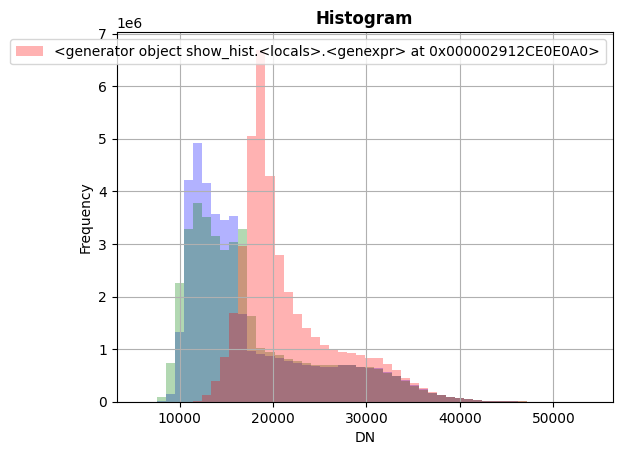

In [11]:
## Plot pixel value histogram in each band. 
rasterio.plot.show_hist(img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

CLIPPING!

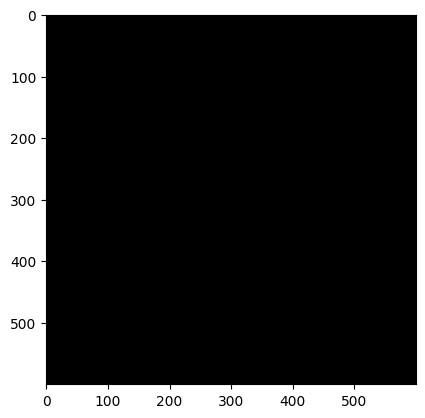

In [12]:
import rasterio
import matplotlib.pyplot as plt

# Open the raster image using rasterio
with rasterio.open('C:\\Users\\IDEAL COMPUTER S\\DIP_LAB\\lab2\\composite\\composite1.tif', 'r') as src:
    # Read the data (bands) from the raster dataset
    img = src.read()

# Assuming you want to clip the data to a specific region within the raster
# For example, here we are clipping the region from rows 300 to 900 and columns 300 to 900
clipped_img = img[:, 300:900, 300:900]

# Visualize the clipped image (assuming it is a 3-band image)
plt.imshow(clipped_img.transpose(1, 2, 0))  # Transpose to (height, width, bands) for visualization
plt.show()
# clipped_img = img[:, 300:900, 300:900]
# plt.imshow(clipped_img[0,:,:])


CALCULATING NDVI Or DESIRED PARAMETERS!

C:\Users\IDEAL COMPUTER S\AppData\Local\Temp\ipykernel_8744\134574689.py:3: RuntimeWarning: invalid value encountered in divide
  ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped)
C:\Users\IDEAL COMPUTER S\AppData\Local\Temp\ipykernel_8744\134574689.py:5: RuntimeWarning: invalid value encountered in divide
  ndvi_clipped2 = np.divide(np.subtract(nir_clipped, red_clipped), np.add(nir_clipped, red_clipped))


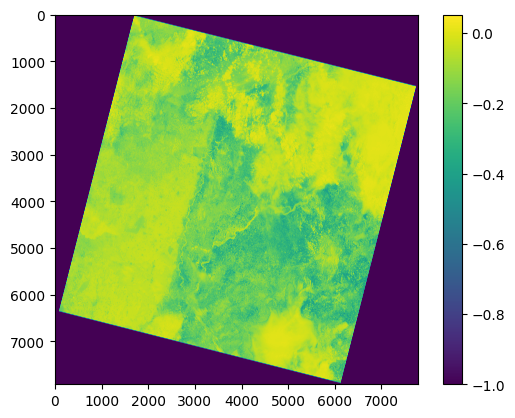

In [13]:
red_clipped = img[0].astype('f4')
nir_clipped = img[1].astype('f4')
ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped)
import numpy as np
ndvi_clipped2 = np.divide(np.subtract(nir_clipped, red_clipped), np.add(nir_clipped, red_clipped))
ndvi_clipped3 = np.nan_to_num(ndvi_clipped2, nan=-1)
plt.imshow(ndvi_clipped3, cmap='viridis')
plt.colorbar()